In [33]:
### voting classification
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




C_value = 10
use_probability = True
multi_mode = 'ovo'
svm_model_linear = svm.SVC(C=C_value, kernel='linear', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

svm_model_rbf = svm.SVC(C=C_value, kernel='rbf', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

svm_model_poly = svm.SVC(C=C_value, kernel='poly', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=20)
linear_dis = LinearDiscriminantAnalysis()


#eclf = VotingClassifier(estimators=[('svc_1', svm_model_linear),('svc_2',svm_model_rbf), ('svc_3', svm_model_poly), ('knn', clf2), ('dt', clf1), ('ld',linear_dis)],
                       #voting='hard', weights=[2,1,1, 1, 1,2])

eclf = VotingClassifier(estimators=[('svc_1', svm_model_linear),('svc_2',svm_model_rbf), ('svc_3', svm_model_poly)],
                       voting='hard')#, #weights=[2,1,1, 1, 1,2])


#clf1 = clf1.fit(X, y)
#clf2 = clf2.fit(X, y)
#clf3 = clf3.fit(X, y)
eclf = eclf.fit(X_train, y_train)

predic = eclf.predict(X_test)
#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()                             

print(confusion_matrix(y_test,predic))  
print(classification_report(y_test,predic))

[[298  48  29  13]
 [349  31   4   4]
 [ 21   5 362   0]
 [ 64   5 312   7]]
              precision    recall  f1-score   support

           0       0.41      0.77      0.53       388
           1       0.35      0.08      0.13       388
           2       0.51      0.93      0.66       388
           3       0.29      0.02      0.03       388

    accuracy                           0.45      1552
   macro avg       0.39      0.45      0.34      1552
weighted avg       0.39      0.45      0.34      1552



In [ ]:
## clinically important for voting ensemble soft

[[288  24  27  49]
 [262 107   5  14]
 [ 15  12 323  38]
 [ 14   1  14 359]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.60       388
           1       0.74      0.28      0.40       388
           2       0.88      0.83      0.85       388
           3       0.78      0.93      0.85       388

    accuracy                           0.69      1552
   macro avg       0.72      0.69      0.67      1552
weighted avg       0.72      0.69      0.67      1552

## clinically important for voting ensemble hard

[[315  18  18  37]
 [271 100  11   6]
 [ 19  17 317  35]
 [ 19   1  16 352]]
              precision    recall  f1-score   support

           0       0.50      0.81      0.62       388
           1       0.74      0.26      0.38       388
           2       0.88      0.82      0.85       388
           3       0.82      0.91      0.86       388

    accuracy                           0.70      1552
   macro avg       0.73      0.70      0.68      1552
weighted avg       0.73      0.70      0.68      1552

## clinically important for voting ensemble hard _ svm only


[[311  25  22  30]
 [187 172  20   9]
 [ 26   7 308  47]
 [ 41   0  12 335]]
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       388
           1       0.84      0.44      0.58       388
           2       0.85      0.79      0.82       388
           3       0.80      0.86      0.83       388

    accuracy                           0.73      1552
   macro avg       0.76      0.73      0.72      1552
weighted avg       0.76      0.73      0.72      1552

## clinically not important for voting ensemble hard


[[313  49  14  12]
 [355  26   6   1]
 [ 45  14 318  11]
 [ 54   4  34 296]]
              precision    recall  f1-score   support

           0       0.41      0.81      0.54       388
           1       0.28      0.07      0.11       388
           2       0.85      0.82      0.84       388
           3       0.93      0.76      0.84       388

    accuracy                           0.61      1552
   macro avg       0.62      0.61      0.58      1552
weighted avg       0.62      0.61      0.58      1552

## clinically not important for voting ensemble hard _svm only


[[298  48  29  13]
 [349  31   4   4]
 [ 21   5 362   0]
 [ 64   5 312   7]]
              precision    recall  f1-score   support

           0       0.41      0.77      0.53       388
           1       0.35      0.08      0.13       388
           2       0.51      0.93      0.66       388
           3       0.29      0.02      0.03       388

    accuracy                           0.45      1552
   macro avg       0.39      0.45      0.34      1552
weighted avg       0.39      0.45      0.34      1552

In [79]:
#class_weights = {}
#for c in range(0,2):
   # class_weights.update({c:len(bin_labels) / float(np.count_nonzero(bin_labels == c))})

input_size=X_train.shape[1]
# Establish the NN
eps=150
opt=RMSprop(lr=0.001)
print (input_size)
X_train.shape


model = Sequential() # feed-forward.
#relu = keras.activations.relu(model, alpha=0.0001, max_value=None, threshold=0.0)

model.add(Dense(input_size, activation='relu', input_dim=input_size))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


history=model.fit(X_train, y_train, class_weight='balanced', epochs=eps)#, callbacks=cb)
y_pred=model.predict(X_test)
# binary classification based on probability.

#y_pred[y_pred <= 0] = 0
#y_pred[y_pred >= 0 and <= 1] = 1
#y_pred[y_pred >= 1 and <= 2] = 2
#y_pred[y_pred >= 2 and <= 3] = 3

#print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))

262
Epoch 1/150
1656/1656 [==============================] - 0s 223us/step - loss: 1.1645 - acc: 0.5236
Epoch 2/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.8256 - acc: 0.6667
Epoch 3/150
1656/1656 [==============================] - 0s 51us/step - loss: 0.7097 - acc: 0.7180
Epoch 4/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.6219 - acc: 0.7585
Epoch 5/150
1656/1656 [==============================] - 0s 50us/step - loss: 0.5209 - acc: 0.8213
Epoch 6/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.4631 - acc: 0.8388
Epoch 7/150
1656/1656 [==============================] - 0s 55us/step - loss: 0.4244 - acc: 0.8454
Epoch 8/150
1656/1656 [==============================] - 0s 47us/step - loss: 0.3763 - acc: 0.8744
Epoch 9/150
1656/1656 [==============================] - 0s 50us/step - loss: 0.3531 - acc: 0.8714
Epoch 10/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.3364 - acc: 0.8762
Epoc

Epoch 83/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.0173 - acc: 0.9940
Epoch 84/150
1656/1656 [==============================] - 0s 47us/step - loss: 0.0138 - acc: 0.9952
Epoch 85/150
1656/1656 [==============================] - 0s 45us/step - loss: 0.0186 - acc: 0.9964
Epoch 86/150
1656/1656 [==============================] - 0s 47us/step - loss: 0.0243 - acc: 0.9909
Epoch 87/150
1656/1656 [==============================] - 0s 45us/step - loss: 0.0275 - acc: 0.9915
Epoch 88/150
1656/1656 [==============================] - 0s 45us/step - loss: 0.0295 - acc: 0.9928
Epoch 89/150
1656/1656 [==============================] - 0s 48us/step - loss: 0.0024 - acc: 0.9994
Epoch 90/150
1656/1656 [==============================] - 0s 47us/step - loss: 0.0180 - acc: 0.9952
Epoch 91/150
1656/1656 [==============================] - 0s 45us/step - loss: 0.0106 - acc: 0.9964
Epoch 92/150
1656/1656 [==============================] - 0s 47us/step - loss: 0.0217 - acc: 0.9903


([array([1.064e+03, 2.300e+01, 1.300e+01, 4.000e+00, 5.000e+00, 4.000e+00,
         5.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 4.000e+00,
         3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
         5.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 1.000e+01,
         3.690e+02]),
  array([1.188e+03, 4.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
         2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
         2.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
         2.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 1.200e+01, 1.300e+01,
         2.730e+02]),
  array([1.19e+03, 1.10e+01, 5.00e+00, 3.00e+00, 2.00e+00, 2.00e+00,
         5.00e+00, 1.00e+00, 6.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
         0.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 1.00e+00, 3.00e+00,
         3.00e+00, 2.00e+00, 4.00e+00, 3.00e+00, 4.00e+00, 1.00e+01,
         2.89e+02]),
  array([1.027e+03, 1.800e+01, 3.000e+00, 3.000e+00, 3.000e

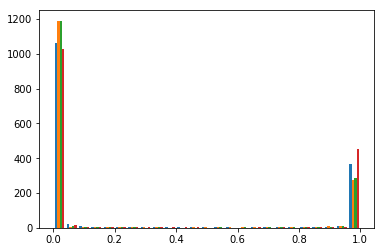

In [83]:
import matplotlib.pyplot as plt
plt.hist(x=y_pred, bins=25)

In [76]:

new_y = y_pred[y_pred <=  0] 
#y_pred[np.all(y_pred >= 0, y_pred <= 1)] = 1
#y_pred[y_pred >= 1 and y_pred <= 2] = 2
#y_pred[y_pred <= 3] = 3


#np.all(y_pred >= 0, y_pred <= 1)




array([], dtype=float32)

In [54]:
y_pred

array([[9.9681938e-01, 1.8912623e-08, 2.2535528e-06, 3.1783844e-03],
       [1.0000000e+00, 1.8767247e-15, 7.7927246e-18, 2.2804840e-09],
       [3.9428017e-01, 6.0544050e-01, 9.0352762e-05, 1.8894635e-04],
       ...,
       [9.9995887e-01, 1.0362184e-05, 2.9946254e-05, 8.1101774e-07],
       [6.8656138e-13, 1.3806310e-28, 9.9999940e-01, 5.4442171e-07],
       [9.9997592e-01, 1.3728231e-06, 1.6730010e-05, 5.9060972e-06]],
      dtype=float32)

In [50]:
y_train.shape

(1656,)

In [13]:
## voting with neural network
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from sklearn.metrics import classification_report, confusion_matrix 

from LossHistory import *
import time


C_value = 10
use_probability = True
multi_mode = 'ovo'
svm_model_linear = svm.SVC(C=C_value, kernel='linear', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

svm_model_rbf = svm.SVC(C=C_value, kernel='rbf', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

svm_model_poly = svm.SVC(C=C_value, kernel='poly', degree=3, gamma='auto', 
                    coef0=0.0, shrinking=True, probability=use_probability, tol=0.001, 
                    cache_size=200, verbose=False, 
                    max_iter=-1, decision_function_shape=multi_mode, random_state=None)

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=20)
linear_dis = LinearDiscriminantAnalysis()


eclf = VotingClassifier(estimators=[('svc_1', svm_model_linear), ('ld', linear_dis), ('dt', clf2)],
                       voting='soft')#, weights=[2, 1, 2])




#clf1 = clf1.fit(X, y)
#clf2 = clf2.fit(X, y)
#clf3 = clf3.fit(X, y)
eclf = eclf.fit(X_train, y_train)

predic = eclf.predict(X_test)
#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()                             

print(confusion_matrix(y_test,predic))  
print(classification_report(y_test,predic))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [45]:
X_train = np_clinic_1
X_test = np_clinic_2
y_train = np_class_ID_1
y_test = np_class_ID_2
input_size=X_train.shape[1]


In [30]:
X_train = np_non_var_1
X_test = np_non_var_2
y_train = np_class_ID_1
y_test = np_class_ID_2
input_size=X_train.shape[1]


In [46]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

ada=RandomUnderSampler(ratio='not minority')
train, train_labels=ada.fit_sample(X_train, y_train)
test, test_labels=ada.fit_sample(X_test, y_test)

X_train = train
X_test = test
y_train = train_labels
y_test = test_labels
input_size=X_train.shape[1]

1656

In [34]:
from sklearn.model_selection import train_test_split

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [14]:
## Adaboost 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix 


#iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train )
predic = clf.predict(X_test)
#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()                             

print(confusion_matrix(y_test,predic))  
print(classification_report(y_test,predic)) 

#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()  

[[19  0  0]
 [ 0 14  1]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
### Ada boost


# clinically important
[[38345  2142   708  2826]
 [ 1348   588   109     5]
 [  391     6  2738    85]
 [   63     0    32   293]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     44021
           1       0.21      0.29      0.25      2050
           2       0.76      0.85      0.80      3220
           3       0.09      0.76      0.16       388

    accuracy                           0.84     49679
   macro avg       0.51      0.69      0.53     49679
weighted avg       0.91      0.84      0.87     49679


### non clinically 
[[41380   433  1301   907]
 [ 1929    62    59     0]
 [  432     8  2774     6]
 [  282     0   100     6]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     44021
           1       0.12      0.03      0.05      2050
           2       0.66      0.86      0.74      3220
           3       0.01      0.02      0.01       388

    accuracy                           0.89     49679
   macro avg       0.43      0.46      0.44     49679
weighted avg       0.88      0.89      0.88     49679

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
     #random_state=0)

#clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, y, cv=5)
#scores.mean()                               


#clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, y, cv=5)
#scores.mean()                               


clf = ExtraTreesClassifier(n_estimators=input_size, max_depth=None,min_samples_split=2, random_state=0)

clf.fit(X_train,y_train )
predic = clf.predict(X_test)
#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()                             

print(confusion_matrix(y_test,predic))  
print(classification_report(y_test,predic)) 
#scores = cross_val_score(clf, X, y, cv=5)
#scores.mean() > 0.999


[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
## extreme random tree

## clinically imporant
[[40794     0  3140    87]
 [ 2005     2    43     0]
 [  399     0  2821     0]
 [   45     0   343     0]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     44021
           1       1.00      0.00      0.00      2050
           2       0.44      0.88      0.59      3220
           3       0.00      0.00      0.00       388

    accuracy                           0.88     49679
   macro avg       0.60      0.45      0.38     49679
weighted avg       0.91      0.88      0.87     49679


## clinically not important
[[39345     0  4676     0]
 [ 2000    11    39     0]
 [  335     0  2885     0]
 [   59     0   328     1]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     44021
           1       1.00      0.01      0.01      2050
           2       0.36      0.90      0.52      3220
           3       1.00      0.00      0.01       388

    accuracy                           0.85     49679
   macro avg       0.83      0.45      0.36     49679
weighted avg       0.91      0.85      0.85     49679

In [48]:
from sklearn.ensemble import BaggingClassifier
##bagging
clf = BaggingClassifier(linear_dis, max_samples=0.5, max_features=0.5)
#iris = load_iris()

clf.fit(X_train,y_train )
predic = clf.predict(X_test)
#scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
#scores.mean()                             

print(confusion_matrix(y_test,predic))  
print(classification_report(y_test,predic)) 

#scores = cross_val_score(X_train, y_train.data, iris.target, 

[[19  0  0]
 [ 0 11  4]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.85      0.73      0.79        15
           2       0.78      0.88      0.82        16

    accuracy                           0.88        50
   macro avg       0.87      0.87      0.87        50
weighted avg       0.88      0.88      0.88        50



In [13]:

C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    clf.C = C
    this_scores = cross_val_score(clf, X, y, cv=5, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()   

<Figure size 640x480 with 1 Axes>

In [2]:
from codes.python import metric
import numpy as np
from scipy import signal
import scipy
from numpy import array
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from mpl_toolkits.mplot3d import axes3d, Axes3D
from codes.python import post_process_features_ex as post_features

from collections import Counter
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Nadam
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from sklearn.metrics import classification_report, confusion_matrix



#ls = [0,1,2,3]
ls = []
ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
#patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]

DB1_patients = pd.read_csv("DB1_patient_list.csv")
#DB1_patients = DB1_patients.drop([1872])
DB1_patients = DB1_patients[DB1_patients['2'].isin(ls)]
#DB1_patients = DB1_patients[DB1_patients['0'].isin(patient_l_1)]


DB2_patients = pd.read_csv("DB2_patient_list.csv")
#DB2_patients= DB2_patients.drop([18692, 31865])
DB2_patients = DB2_patients[DB2_patients['2'].isin(ls)]
#DB2_patients = DB2_patients[DB2_patients['0'].isin(patient_l_2)]


DB1 = pd.read_csv("DB1.csv")
#DB1 = DB1.drop([1872])
DB1 = DB1[DB1['class_beat'].isin(ls)]
#DB1 = DB1[DB1['patient'].isin(patient_l_1)]


DB2 = pd.read_csv("DB2.csv")
#DB2 = DB2.drop([18692, 31865])
DB2 = DB2[DB2['class_beat'].isin(ls)]
#DB2 = DB2[DB2['patient'].isin(patient_l_2)]

patients_ls_1 = DB1_patients.iloc[:,0]
patients_ls_2 = DB2_patients.iloc[:,0]

patients_ls_1_ID = DB1_patients.iloc[:,1]
patients_ls_2_ID = DB2_patients.iloc[:,1]

patients_ls_1_type = DB1_patients.iloc[:,2]
patients_ls_2_type = DB2_patients.iloc[:,2]

#patients_ls_1 = np.asarray(DB1_patients, dtype=int)
patients_ls_1 = [int(i) for i in patients_ls_1]
patients_ls_1 = np.asarray(patients_ls_1, dtype=int)
patients_ls_1 = patients_ls_1.reshape(patients_ls_1.shape[0],1)
#patients_ls_2 = np.asarray(DB2_patients, dtype=int)
patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_2 = np.asarray(patients_ls_2, dtype=int)
patients_ls_2 = patients_ls_2.reshape(patients_ls_2.shape[0],1)

patients_ls_all = np.vstack((patients_ls_1,patients_ls_2))

#patients_ls_all = patients_ls_all.reshape(7980,1)

patients_ls_all = [int(i) for i in patients_ls_all]

patients_ls_2 = [int(i) for i in patients_ls_2]
patients_ls_1 = [int(i) for i in patients_ls_1]


DB1_non_cli = pd.read_csv("DB1_non_clinic.csv")
#DB1_non_cli = DB1_non_cli.drop([1872])
#DB1_non_cli = DB1_non_cli[DB1_non_cli['patient'].isin(patient_l_1)]


DB1_non_cli = DB1_non_cli[DB1_non_cli['y0'].isin(ls)]


DB2_non_cli = pd.read_csv("DB2_non_clinic.csv")
#DB2_non_cli= DB2_non_cli.drop([18692, 31865])
DB2_non_cli = DB2_non_cli[DB2_non_cli['y0'].isin(ls)]
#DB2_non_cli = DB2_non_cli[DB2_non_cli['patient'].isin(patient_l_2)]


DB1_V1 = pd.read_csv("DB1_V1.csv")
#DB1_V1 = DB1_V1.drop([1872])
DB1_V1 = DB1_V1[DB1_V1['class_beat'].isin(ls)]
#DB1_V1 = DB1_V1[DB1_V1['patient'].isin(patient_l_1)]



DB2_V1 = pd.read_csv("DB2_V1.csv")
#DB2_V1 = DB2_V1.drop([18692, 31865])
DB2_V1 = DB2_V1[DB2_V1['class_beat'].isin(ls)]
#DB2_V1 = DB2_V1[DB2_V1['patient'].isin(patient_l_2)]

ls = []
ls.extend(["['N']","['L']", "['R']"])                    # N
ls.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls.extend(["['V']", "['E']"])                         # VEB
ls.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])
DB1_dwt = pd.read_csv("DB1_DTW_MLII.csv")
#DB1_dwt = DB1_dwt.drop([1872])
DB1_dwt = DB1_dwt[DB1_dwt['beat_type'].isin(ls)]
#DB1_dwt = DB1_dwt[DB1_dwt['patient'].isin(patient_l_1)]


DB2_dwt = pd.read_csv("DB2_DTW_MLII.csv")
#DB2_dwt = DB2_dwt.drop([18692, 31865])
DB2_dwt = DB2_dwt[DB2_dwt['beat_type'].isin(ls)]
#DB2_dwt = DB2_dwt[DB2_dwt['patient'].isin(patient_l_2)]


DB1_dwt_V1 = pd.read_csv("DB1_DTW_V1.csv")
#DB1_dwt_V1 = DB1_dwt_V1.drop([1872])
DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['beat_type'].isin(ls)]
#DB1_dwt_V1 = DB1_dwt_V1[DB1_dwt_V1['patient'].isin(patient_l_1)]



DB2_dwt_V1 = pd.read_csv("DB2_DTW_V1.csv")
#DB2_dwt_V1 = DB2_dwt_V1.drop([18692, 31865])
DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['beat_type'].isin(ls)]
#DB2_dwt_V1 = DB2_dwt_V1[DB2_dwt_V1['patient'].isin(patient_l_2)]

 #list(DB1.columns.values)
variables_1 = DB1.iloc[:,0:130]
class_beat_1 = DB1_patients.iloc[:,2]
class_ID_1 = DB1_patients.iloc[:,1]

np_variables_1 = np.asarray(variables_1)
np_class_beat_1 = np.asarray(class_beat_1)
np_class_ID_1 = np.asarray(class_ID_1)

np_class_beat_1 = np_class_beat_1.reshape(np_class_beat_1.shape[0],1)
np_class_ID_1 = np_class_ID_1.reshape(np_class_ID_1.shape[0],1)

variables_2 = DB2.iloc[:,0:130]
class_beat_2 = DB2_patients.iloc[:,2]
class_ID_2 = DB2_patients.iloc[:,1]

np_variables_2 = np.asarray(variables_2)
np_class_beat_2 = np.asarray(class_beat_2)
np_class_ID_2 = np.asarray(class_ID_2)

np_class_beat_2 = np_class_beat_2.reshape(np_class_beat_2.shape[0],1)
np_class_ID_2 = np_class_ID_2.reshape(np_class_ID_2.shape[0],1)

DB_var_all = np.vstack((np_variables_1,np_variables_2))
DB_class_all = np.vstack((np_class_ID_1,np_class_ID_2))
DB_type_all = np.vstack((np_class_beat_1,np_class_beat_2))

np_class_beat_1 = [str(i) for i in np_class_beat_1]
np_class_ID_1 = [int(i) for i in np_class_ID_1]

np_class_beat_1 = np.asarray(np_class_beat_1)
np_class_ID_1 = np.asarray(np_class_ID_1)


np_class_beat_2 = [str(i) for i in np_class_beat_2]
np_class_ID_2 = [int(i) for i in np_class_ID_2]

np_class_beat_2 = np.asarray(np_class_beat_2)
np_class_ID_2 = np.asarray(np_class_ID_2)

DB_type_all = [str(i) for i in DB_type_all]
DB_class_all = [int(i) for i in DB_class_all]

DB_type_all = np.asarray(DB_type_all)
DB_class_all = np.asarray(DB_class_all)

np_non_1 = np.asarray(DB1_non_cli)
np_non_2 = np.asarray(DB2_non_cli)

np_non_var_1 = np.asarray(DB1_non_cli.iloc[:,0:140])



np_non_var_2 = np.asarray(DB2_non_cli.iloc[:,0:140])

DB_var_non_all = np.vstack((np_non_var_1,np_non_var_2))

dis_1 = DB1_dwt.iloc[:,0]


dis_2 = DB2_dwt.iloc[:,0]

dis_1_V1 = DB1_dwt_V1.iloc[:,0]


dis_2_V1 = DB2_dwt_V1.iloc[:,0]

dtw_1 = np.asarray(dis_1)
dtw_1 = dtw_1.reshape(dtw_1.shape[0],1)

dtw_2 = np.asarray(dis_2)
dtw_2 = dtw_2.reshape(dtw_2.shape[0],1)

dtw_1_V1 = np.asarray(dis_1_V1)
dtw_1_V1 = dtw_1_V1.reshape(dtw_1_V1.shape[0],1)


dtw_2_V1 = np.asarray(dis_2_V1)
dtw_2_V1 = dtw_2_V1.reshape(dtw_2_V1.shape[0],1)

v1_1 = DB1_V1.iloc[:,0:130]

np_V1_1 = np.asarray(v1_1)


v1_2 = DB2_V1.iloc[:,0:130]

np_V1_2 = np.asarray(v1_2)

DB_v_var_all = np.vstack((np_V1_1,np_V1_2))

dtw_clinic_1 = np.hstack((dtw_1, dtw_1_V1))
dtw_clinic_2 = np.hstack((dtw_2, dtw_2_V1))


norm_dtw_clinic_1 = post_features.normalised_values_multiples(dtw_clinic_1)
norm_dtw_clinic_2 = post_features.normalised_values_multiples(dtw_clinic_2)


np_clinic_1 = np.hstack((np_variables_1, np_V1_1, dtw_clinic_1))
np_clinic_2 = np.hstack((np_variables_2,np_V1_2, dtw_clinic_2))

np_clinic_all = np.hstack((DB_var_all,DB_v_var_all))

C:\Users\nimch681\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


done norm
row 0 done
done norm
row 1 done
done norm
row 0 done
done norm
row 1 done


In [3]:
ls = []
ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
DB1_amp = pd.read_csv("DB1_amp_time.csv")
#DB1_amp = DB1_amp.drop([1872])
#DB1_amp = DB1_amp[DB1_amp['patient'].isin(patient_l_1)]
DB1_amp = DB1_amp[DB1_amp['col1080'].isin(ls)]




DB2_amp = pd.read_csv("DB2_amp_time.csv")
#DB2_amp = DB2_amp.drop([18692, 31865])
#DB2_amp = DB2_amp[DB2_amp['patient'].isin(patient_l_2)]
DB2_amp = DB2_amp[DB2_amp['col1080'].isin(ls)]


In [4]:
ampt_time_1 = DB1_amp.iloc[:,0:1082-2]


ampt_time_2 = DB2_amp.iloc[:,0:1082-2]

np_amp_1 = np.asarray(ampt_time_1)
np_amp_2 = np.asarray(ampt_time_2)